# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

flight = pd.read_csv("flight.csv")
#print(flight.head())

In [2]:
print(f'The average coach price is ${int(round(np.mean(flight.coach_price)))}.')
print(f'The minimum coach price is ${int(round(np.min(flight.coach_price)))}.')
print(f'The maximum coach price is ${int(round(np.max(flight.coach_price)))}.')
print(f'''\nThe $500 coach ticket is in the upper 2% of the coach tickets,
so this is relatively far from the interquartile range, which is between
these two values: {np.percentile(flight.coach_price, [25,75])}. 
The upper 2% range is between these two numbers {np.percentile(flight.coach_price, [98,100])}''')

The average coach price is $377.
The minimum coach price is $44.
The maximum coach price is $594.

The $500 coach ticket is in the upper 2% of the coach tickets,
so this is relatively far from the interquartile range, which is between
these two values: [331.445   426.67625]. 
The upper 2% range is between these two numbers [499.1113 593.635 ]


In [3]:
#flight.coach_price.describe()

In [4]:
#flight.describe(include='all')

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [5]:
## Task 2

In [6]:
flight['coach_price_long'] = flight.coach_price[flight.hours == 8]

In [7]:
flight.reset_index()

,index,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours,coach_price_long
0,0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1,NaN
1,1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6,NaN
2,2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3,NaN
3,3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2,NaN
4,4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129775,129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1,NaN
129776,129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4,NaN
129777,129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3,NaN
129778,129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5,NaN


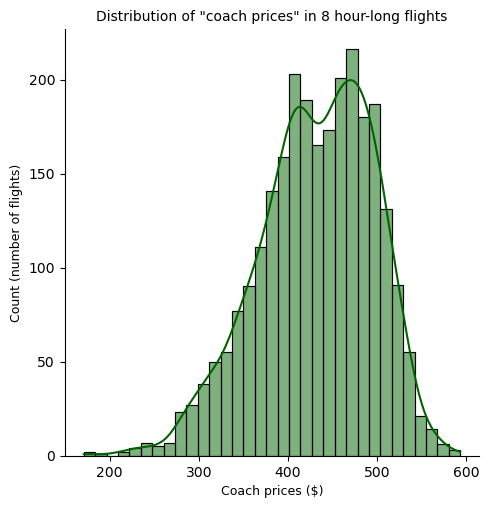

<Figure size 640x480 with 0 Axes>

In [8]:
sns.displot(flight.coach_price_long, kde=True, color='darkgreen')
plt.title('Distribution of "coach prices" in 8 hour-long flights', fontsize=10)
plt.xlabel('Coach prices ($)', fontsize=9)
plt.ylabel('Count (number of flights)', fontsize=9)
plt.show()
plt.clf()

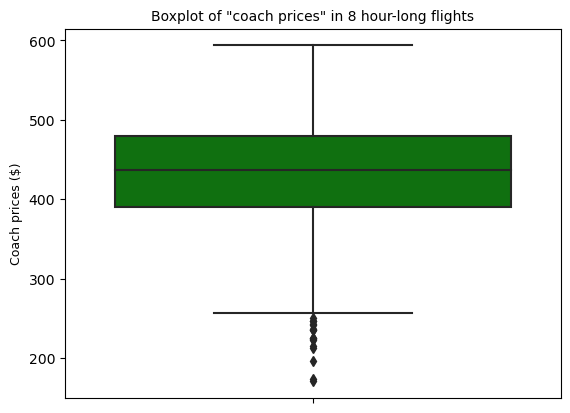

<Figure size 640x480 with 0 Axes>

In [32]:
sns.boxplot(y='coach_price_long', data=flight, color='green')
plt.title('Boxplot of "coach prices" in 8 hour-long flights', fontsize=10)
plt.ylabel('Coach prices ($)', fontsize=9)
plt.show()
plt.clf()

In [10]:
print('The $500 ticket price is more reasonable in a 8 hour-long flight.')

The $500 ticket price is more reasonable in a 8 hour-long flight.


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [11]:
#print(flight.delay.unique())

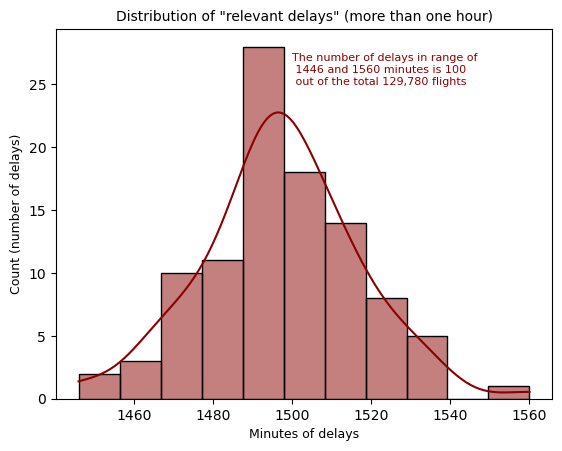

<Figure size 640x480 with 0 Axes>

In [12]:
## Task 3
big_delayes = flight.delay[flight.delay > 60]
sns.histplot(big_delayes, kde=True, bins=11, color='darkred')
plt.title('Distribution of "relevant delays" (more than one hour)', fontsize=10)
plt.xlabel('Minutes of delays', fontsize=9)
plt.ylabel('Count (number of delays)', fontsize=9)
plt.text(x= 1500, y= 25, s=f'''The number of delays in range of \n {np.min(big_delayes)} and {np.max(big_delayes)} minutes is {len(big_delayes)}
 out of the total {len(flight.delay):,} flights''', fontsize=8, color='darkred')
plt.show()
plt.clf()

In [ ]:
#print(f'The number of flights having "relevant delays" is {len(big_delayes)}.')
#print(f'The total number of flights is {len(flight.delay):,}.')

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [ ]:
## Task 4

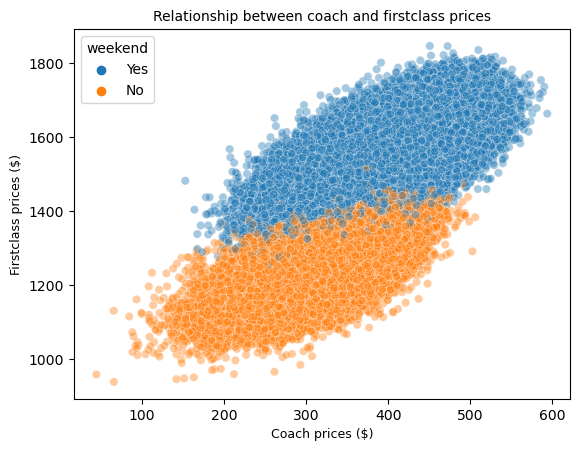

<Figure size 640x480 with 0 Axes>

In [13]:
sns.scatterplot(x='coach_price', y='firstclass_price', data=flight, hue='weekend', alpha=0.4)
plt.title('Relationship between coach and firstclass prices', fontsize=10)
plt.xlabel('Coach prices ($)', fontsize=9)
plt.ylabel('Firstclass prices ($)', fontsize=9)
plt.show()
plt.clf()

In [14]:
print('''The scatterplot shows not just that higher coach prices have higher firstclass prices, which means there is a strong 
correlation between them, but it is 100% sure, that flying in firstclass on weekdays is much cheaper than at weekends.''')

The scatterplot shows not just that higher coach prices have higher firstclass prices, which means there is a strong 
correlation between them, but it is 100% sure, that flying in firstclass on weekdays is much cheaper than at weekends.


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [15]:
## Task 5



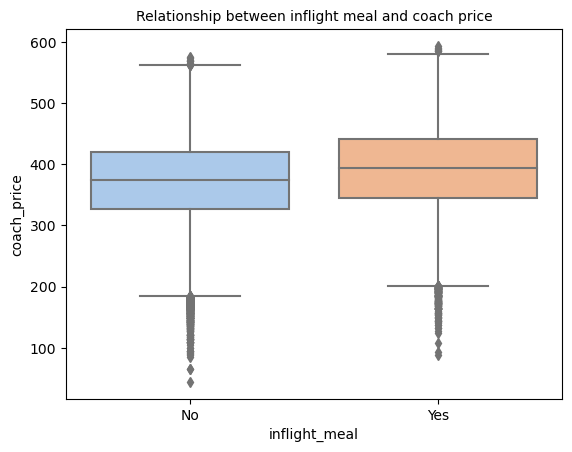

<Figure size 640x480 with 0 Axes>

In [16]:
sns.boxplot(x='inflight_meal', y='coach_price', data=flight, palette='pastel')
plt.title(f'Relationship between inflight meal and coach price', fontsize=10)
plt.show()
plt.clf()

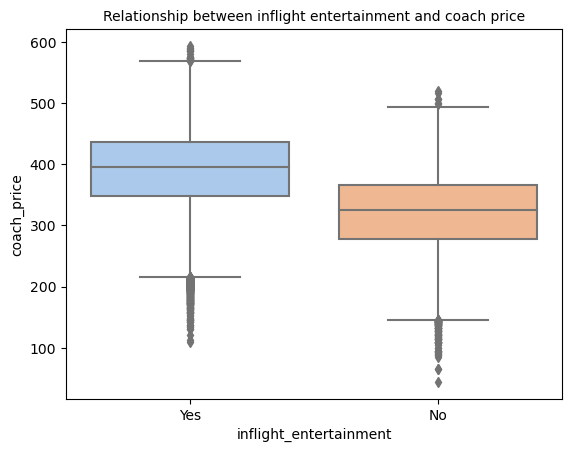

<Figure size 640x480 with 0 Axes>

In [17]:
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, palette='pastel')
plt.title(f'Relationship between inflight entertainment and coach price', fontsize=10)
plt.show()
plt.clf()

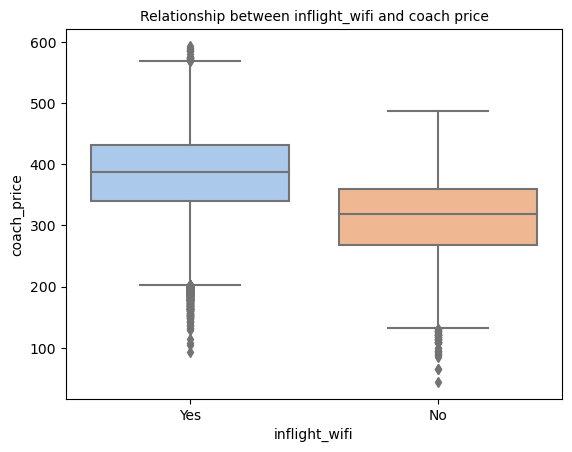

<Figure size 640x480 with 0 Axes>

In [18]:
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, palette='pastel')
plt.title(f'Relationship between inflight_wifi and coach price', fontsize=10)
plt.show()
plt.clf()

In [19]:
print('Meal does not have much effect on coach prices, but wifi has little and entertainment is the most influential among them.')

Meal does not have much effect on coach prices, but wifi has little and entertainment is the most influential among them.


6. How does the number of passengers change in relation to the length of flights?

In [20]:
## Task 6



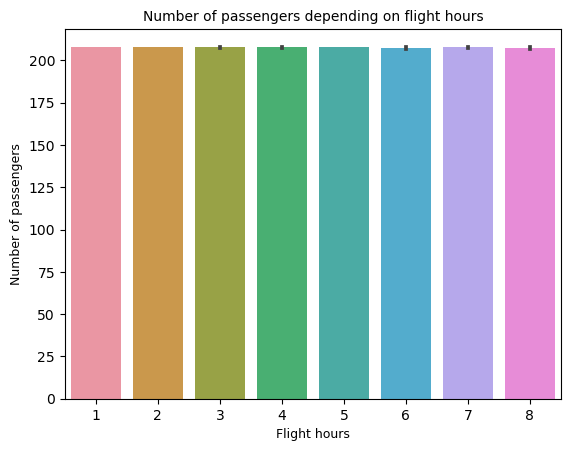

<Figure size 640x480 with 0 Axes>

In [21]:
sns.set_palette("Spectral")
sns.barplot(x='hours', y='passengers', data=flight)
plt.title('Number of passengers depending on flight hours', fontsize=10)
plt.xlabel('Flight hours', fontsize=9)
plt.ylabel('Number of passengers', fontsize=9)
plt.show()
plt.clf()

In [22]:
model = sm.OLS.from_formula('firstclass_price ~ coach_price', data=flight).fit()
pred_400 = model.params[0] + model.params[1]*400
#print(model.params)
#print(pred_400)
a = 700
data = {'coach_price':[a]}
pred_700 = model.predict(data)
print(f'If the coach price will exceed the ${a}, the predicted firstclass price will reach ${int(round(pred_700[0], 3))}.')

If the coach price will exceed the $700, the predicted firstclass price will reach $2043.


In [23]:
fitted_values = model.predict(flight)
residuals = flight.firstclass_price - fitted_values

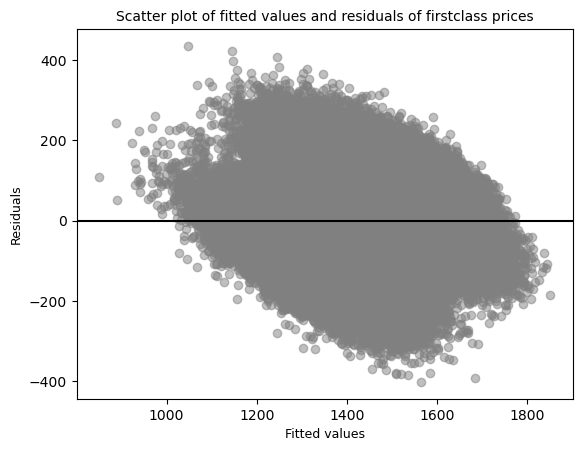

<Figure size 640x480 with 0 Axes>

In [24]:
plt.scatter(fitted_values, residuals, color='gray', alpha=0.5)
plt.title('Scatter plot of fitted values and residuals of firstclass prices', fontsize=10)
plt.xlabel('Fitted values', fontsize=9)
plt.ylabel('Residuals', fontsize=9)
plt.axhline(0, color='black')
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

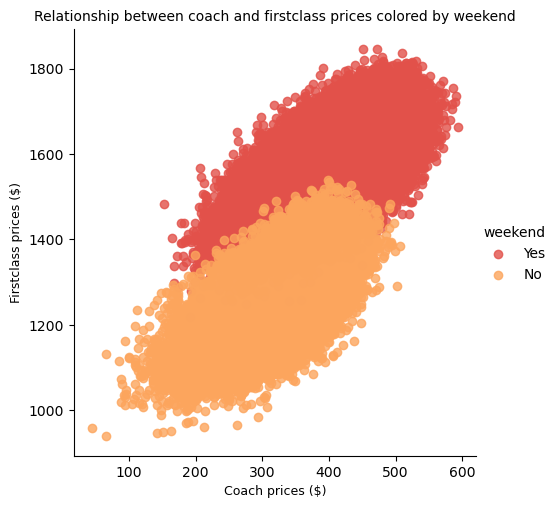

<Figure size 640x480 with 0 Axes>

In [25]:
## Task 7
sns.lmplot(x='coach_price', y='firstclass_price', data=flight, hue='weekend', fit_reg=False)
plt.title('Relationship between coach and firstclass prices colored by weekend', fontsize=10)
plt.xlabel('Coach prices ($)', fontsize=9)
plt.ylabel('Firstclass prices ($)', fontsize=9)
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

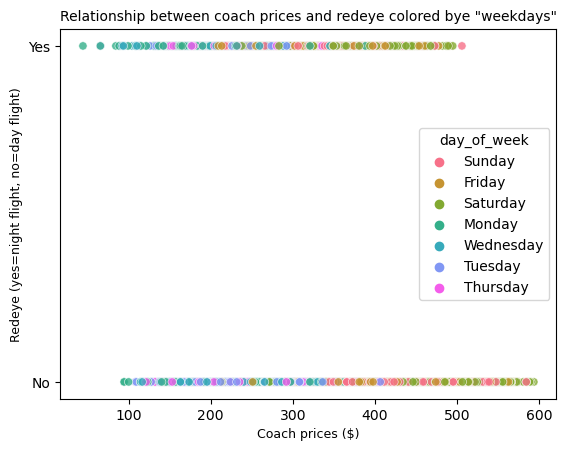

<Figure size 640x480 with 0 Axes>

In [28]:
## Task 8
sns.scatterplot(x='coach_price', y='redeye', data=flight, hue='day_of_week', alpha=0.8)
plt.title('Relationship between coach prices and redeye colored bye "weekdays"', fontsize=10)
plt.xlabel('Coach prices ($)', fontsize=9)
plt.ylabel('Redeye (yes=night flight, no=day flight)', fontsize=9)
plt.show()
plt.clf()

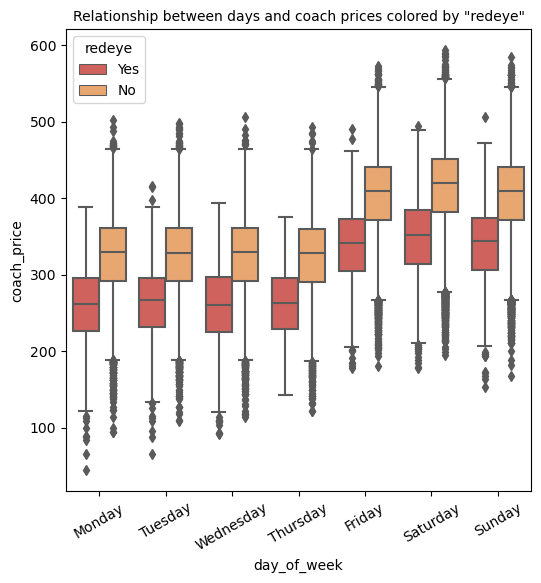

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=[6,6])
sns.boxplot(x='day_of_week', y='coach_price', data=flight, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='redeye')
plt.title('Relationship between days and coach prices colored by "redeye"', fontsize=10)
plt.xticks(rotation=30)
plt.show()
plt.clf()